# Feedforward Neural Networks

This week, we will introduce (artificial) neural networks, which are machine learning methods that draw inspiration from biological nervous systems where huge numbers of interconnected neurons (nerve cells) send electricalchemical signals, frequently in response to external stimuli, to one another throughout the body and within the brain.

Neural networks excel at machine learning tasks when large amounts of data is available (thousands of datapoints). We will, for now, focus on the applications of neural networks to classification and regression problems.

This week's notes will be mostly dedicated sharing my code with you because we will primarily be studying from <a href="http://neuralnetworksanddeeplearning.com/">*Neural Networks and Deep Learning*</a> by Michael Nielsen. This <a href="https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi">playlist of YouTube videos</a> is based on Nielsen's book and is pretty amazing for explaining this content as well. I cannot recommend it enough!

<a href="https://github.com/mnielsen/neural-networks-and-deep-learning">Nielsen's code</a> is written in Python 2.7, so I would not recommend using his code, but Michal Daniel Dobrzanski provides <a href="https://github.com/MichalDanielDobrzanski/DeepLearningPython35">updated code</a> in Python 3.5.

## Perceptrons

Refer to my PDF notes for details, but we will write some code for Perceptrons below. First, we import numpy.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [103]:
class Perceptron:
    
    def __init__(self, N, alpha = 0.1):
        # initialize the weights randomly and learning rate
        self.W = np.random.randn(N + 1)
        self.alpha = alpha
        
    def fit(self, X, y, epochs = 10):
        # insert a column of 1s at the end of X
        X = np.hstack((X, np.ones([X.shape[0], 1])))
        
        for epoch in range(epochs):
            # do the dot product between w and x
            for (x, target) in zip(X,y):
                
                dotProduct = np.dot(x, self.W)
                
                if dotProduct < 0 and target == 1:
                    self.W += self.alpha*x
                
                if dotProduct >= 0 and target == 0:
                    self.W -= self.alpha*x
                    
    def predict(self, X):
        X = np.hstack((X, np.ones([X.shape[0], 1])))
        
        predictedY = np.zeros([X.shape[0], 1])
        
        for counter in range(X.shape[0]):
            dotProduct = np.dot(X[counter,], self.W)
            
            if dotProduct < 0:
                predictedY[counter] = 0
            
            else:
                predictedY[counter] = 1
                
        return predictedY

### Example: AND function

In [83]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

model = Perceptron(X.shape[1], alpha=0.1)
model.fit(X, y, epochs=100)
yPredicted = model.predict(X)

print(classification_report(y, yPredicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



### Example: Random Points

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



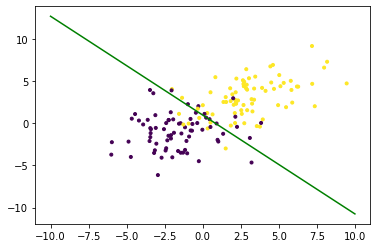

In [102]:
# number of points to generate
numberOfPoints = 100

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# stack the points
X = np.vstack((X1, X2))

# create a vector of the labels
y = np.hstack((numberOfPoints * [0], numberOfPoints * [1]))

# train test split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

# instantiate a model
model = Perceptron(2)

# fit the model to the training data
model.fit(trainX, trainY, epochs = 1000)
predictedY = model.predict(testX)

print(classification_report(testY, predictedY))

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

parameters = model.W

xModel = np.linspace(-10, 10, 100)
yModel = -parameters[0]/parameters[1]*xModel - parameters[2]/parameters[0]
lineFormula = '{:.3f}x_1+{:.3f}x_2+{:.3f}=0'.format(parameters[0], parameters[1], parameters[2])
plt.plot(xModel, yModel, 'g', label = lineFormula)

## Code for Feedforward Neural Networks

Let's take it a step forward and write some code for neural networks (to be continued!)

In [13]:
class FeedforwardNeuralNetwork:
    
    def __init__(self, layers, alpha):
        
        # list of weight matrices
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for counter in range(len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i+1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1), layers[-1])
        
    # define the sigmoid activation
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the derivative of a sigmoid activation
    def sigmoidDerivative(self, x):
        return sigmoid(x) * (1 - sigmoid(x))
    
    # feedforward
    def feedforward(self, X, y):
        for layer in range(len(self.W)):
            # feed!
            1+1
            
    # backprop
    def backpropagation(self, X, y):
        # do a thing
        1+1
    
    # fit the model
    def fit(self, X, y, epochs = 1000, displayUpdate = 100):
        
        for epoch in range(epochs):
            # feedforward
            1+1
            
            # backprop
            1+1
            
            # weight update
            1+1